# Iteration 1 
This notebook demonstrates the `train` and `test` functions for the dataset. The focus is to setup the basic model to have a good accuracy. 

In [ ]:
# Import required modules
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from model_1 import Net
from train import train, train_losses, train_acc
from test import test, test_losses, test_acc
from torchsummary import summary

In [ ]:
# Data transforms (use helpers from train.py)
from train import train_transforms, test_transforms

# Set augment=True to enable small augmentations during training
train_transforms = train_transforms(augment=False)
test_transforms = test_transforms()

In [3]:
# Dataset and DataLoader
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
# Model, device, optimizer
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
           Conv2d-14             [-1, 1

In [5]:
# Training and Testing Loop
EPOCHS = 15
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch}")
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.01206724438816309 Batch_id=937 Accuracy=82.78: 100%|██████████| 938/938 [00:25<00:00, 36.89it/s]



Test set: Average loss: 0.1184, Accuracy: 9613/10000 (96.13%)

EPOCH: 1


Loss=0.1295887678861618 Batch_id=937 Accuracy=97.41: 100%|██████████| 938/938 [00:25<00:00, 36.68it/s]



Test set: Average loss: 0.0549, Accuracy: 9825/10000 (98.25%)

EPOCH: 2


Loss=0.10910841822624207 Batch_id=937 Accuracy=98.14: 100%|██████████| 938/938 [00:25<00:00, 37.34it/s]



Test set: Average loss: 0.0468, Accuracy: 9849/10000 (98.49%)

EPOCH: 3


Loss=0.049784980714321136 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:25<00:00, 36.41it/s]



Test set: Average loss: 0.0469, Accuracy: 9849/10000 (98.49%)

EPOCH: 4


Loss=0.010011084377765656 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:25<00:00, 36.30it/s]



Test set: Average loss: 0.0426, Accuracy: 9862/10000 (98.62%)

EPOCH: 5


Loss=0.0006311167380772531 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:26<00:00, 35.91it/s]



Test set: Average loss: 0.0338, Accuracy: 9882/10000 (98.82%)

EPOCH: 6


Loss=0.021737683564424515 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:25<00:00, 36.45it/s]



Test set: Average loss: 0.0345, Accuracy: 9883/10000 (98.83%)

EPOCH: 7


Loss=0.006577363703399897 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:25<00:00, 36.26it/s]



Test set: Average loss: 0.0337, Accuracy: 9890/10000 (98.90%)

EPOCH: 8


Loss=0.045202627778053284 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:25<00:00, 36.28it/s]



Test set: Average loss: 0.0377, Accuracy: 9882/10000 (98.82%)

EPOCH: 9


Loss=0.00463481992483139 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:25<00:00, 36.15it/s]



Test set: Average loss: 0.0361, Accuracy: 9886/10000 (98.86%)

EPOCH: 10


Loss=0.0038205289747565985 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:25<00:00, 36.21it/s]



Test set: Average loss: 0.0414, Accuracy: 9882/10000 (98.82%)

EPOCH: 11


Loss=0.025055568665266037 Batch_id=937 Accuracy=99.40: 100%|██████████| 938/938 [00:26<00:00, 35.56it/s]



Test set: Average loss: 0.0401, Accuracy: 9882/10000 (98.82%)

EPOCH: 12


Loss=4.6109613322187215e-05 Batch_id=937 Accuracy=99.49: 100%|██████████| 938/938 [00:25<00:00, 36.11it/s]



Test set: Average loss: 0.0367, Accuracy: 9890/10000 (98.90%)

EPOCH: 13


Loss=0.0016262290300801396 Batch_id=937 Accuracy=99.49: 100%|██████████| 938/938 [00:26<00:00, 35.95it/s]



Test set: Average loss: 0.0329, Accuracy: 9896/10000 (98.96%)

EPOCH: 14


Loss=0.1180378645658493 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:26<00:00, 35.44it/s]



Test set: Average loss: 0.0385, Accuracy: 9889/10000 (98.89%)



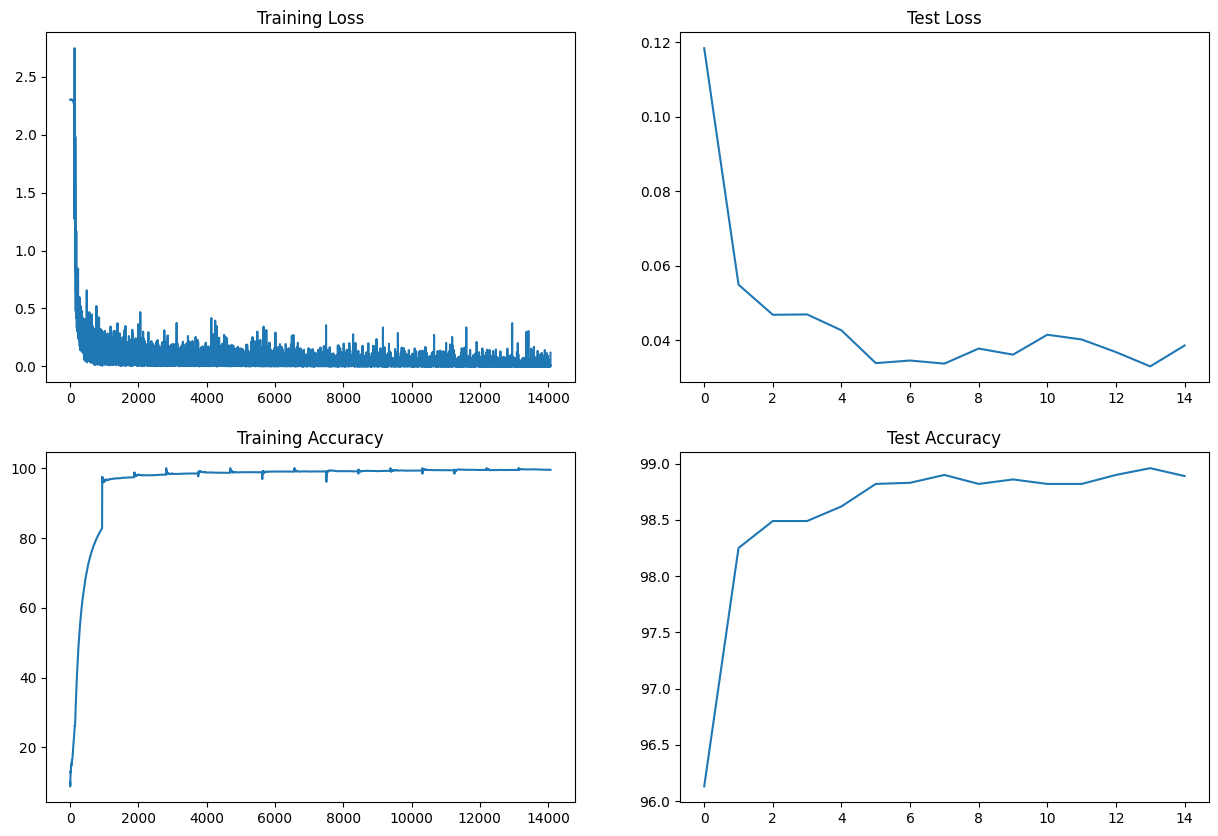

In [6]:
# Plotting results
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()